In [9]:
import torch, os
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import tqdm
from lib.utility import convert_image_np, visualize_stn, wrap, RandomRTS, to_var, to_cuda
from lib.train import Trainer
from scipy.misc import imrotate
from PIL import Image
import math
from itertools import product
from lib.dataset import DoubleMNIST
from lib.model import STN2, STN3

plt.ion()   # interactive mode
use_cuda = torch.cuda.is_available()

In [3]:
def getTest(model, degrees, translations, scalings, visualize=False, use_cuda=torch.cuda.is_available()):
    t = Trainer(model)

    test_acc = []
    for degree, translation, scaling in product(degrees, translations, scalings):
        print('r: %d, t: %d, s: %d' % (degree, translation * 100, scaling * 100))
        visual_loader = torch.utils.data.DataLoader(
            datasets.MNIST(root='.', train=False, transform=transforms.Compose([
                RandomRTS(degree=(-degree, degree), translate=(-translation, translation), 
                          scale=(1-scaling, 1+scaling)),
                wrap(transforms.ToTensor()),
                wrap(transforms.Normalize((0.1307,), (0.3081,)))
            ])), batch_size=64, shuffle=True, num_workers=4)

        test_acc.append(t.test(visual_loader))
    
        if visualize:
            visualize_stn(model, visual_loader, use_cuda=use_cuda)
            plt.show()
    
    return test_acc

r: 0, t: 0, s: 0

Test set: Average loss: 0.1074, Accuracy: 9629/10000 (96%)

r: 45, t: 0, s: 0

Test set: Average loss: 0.1131, Accuracy: 9623/10000 (96%)

r: 60, t: 0, s: 0

Test set: Average loss: 0.1149, Accuracy: 9616/10000 (96%)

r: 75, t: 0, s: 0

Test set: Average loss: 0.1141, Accuracy: 9622/10000 (96%)

r: 90, t: 0, s: 0

Test set: Average loss: 0.1326, Accuracy: 9578/10000 (96%)

r: 105, t: 0, s: 0

Test set: Average loss: 0.1974, Accuracy: 9358/10000 (94%)

r: 120, t: 0, s: 0

Test set: Average loss: 0.3390, Accuracy: 8989/10000 (90%)

r: 135, t: 0, s: 0

Test set: Average loss: 0.5617, Accuracy: 8523/10000 (85%)

r: 180, t: 0, s: 0

Test set: Average loss: 1.2317, Accuracy: 7510/10000 (75%)

r: 0, t: 0, s: 0

Test set: Average loss: 0.0875, Accuracy: 9731/10000 (97%)

r: 45, t: 0, s: 0

Test set: Average loss: 0.0758, Accuracy: 9759/10000 (98%)

r: 60, t: 0, s: 0

Test set: Average loss: 0.0783, Accuracy: 9760/10000 (98%)

r: 75, t: 0, s: 0

Test set: Average loss: 0.0909,

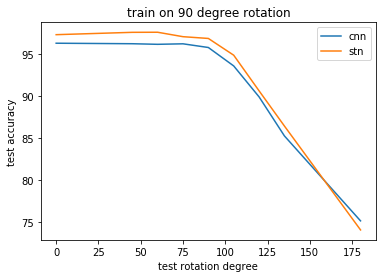

In [5]:
degrees = [0, 45, 60, 75, 90, 105, 120, 135, 180]
translations = [0]
scalings = [0]

cnn = torch.load('models/cnn_R90_T0_S0.cpt')
cnn_test_acc = getTest(cnn, degrees, translations, scalings)
stn = torch.load('models/STN_R90_T0_S0.cpt')
stn_test_acc = getTest(stn, degrees, translations, scalings)

plt.plot(degrees, cnn_test_acc, label="cnn")
plt.plot(degrees, stn_test_acc, label="stn")
plt.legend()
plt.ylabel('test accuracy')
plt.xlabel('test rotation degree')
plt.title('train on 90 degree rotation')
plt.show()

r: 0, t: 0, s: 0

Test set: Average loss: 0.0953, Accuracy: 9703/10000 (97%)

r: 0, t: 5, s: 0

Test set: Average loss: 0.0923, Accuracy: 9708/10000 (97%)

r: 0, t: 10, s: 0

Test set: Average loss: 0.1228, Accuracy: 9620/10000 (96%)

r: 0, t: 20, s: 0

Test set: Average loss: 0.5977, Accuracy: 8183/10000 (82%)

r: 0, t: 30, s: 0

Test set: Average loss: 2.0041, Accuracy: 5288/10000 (53%)

r: 0, t: 0, s: 0

Test set: Average loss: 0.0488, Accuracy: 9844/10000 (98%)



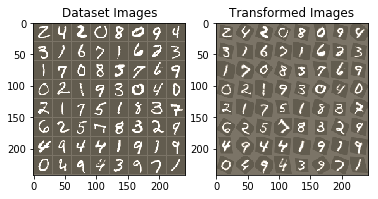

r: 0, t: 5, s: 0

Test set: Average loss: 0.0524, Accuracy: 9834/10000 (98%)



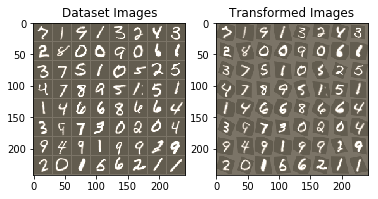

r: 0, t: 10, s: 0

Test set: Average loss: 0.0652, Accuracy: 9788/10000 (98%)



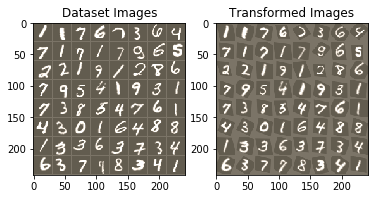

r: 0, t: 20, s: 0

Test set: Average loss: 0.2921, Accuracy: 9231/10000 (92%)



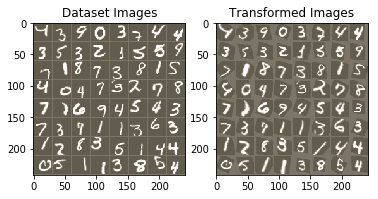

r: 0, t: 30, s: 0

Test set: Average loss: 1.4376, Accuracy: 6960/10000 (70%)



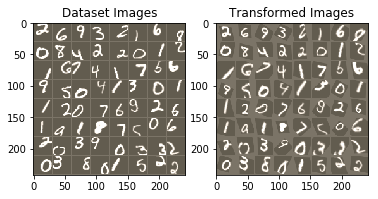

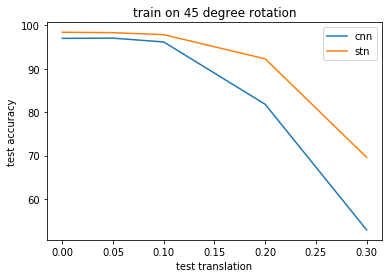

In [16]:
degrees = [0]
translations = [0, 0.05, 0.1, 0.2, 0.3]
scalings = [0]

cnn = torch.load('models/cnn_R45_T10_S30.cpt')
cnn_test_acc = getTest(cnn, degrees, translations, scalings)
stn = torch.load('models/STN_R45_T10_S30.cpt')
stn_test_acc = getTest(stn, degrees, translations, scalings, visualize=True)

plt.plot(translations, cnn_test_acc, label="cnn")
plt.plot(translations, stn_test_acc, label="stn")
plt.legend()
plt.ylabel('test accuracy')
plt.xlabel('test translation')
plt.title('train on 45 degree rotation')
plt.show()

r: 0, t: 0, s: 10

Test set: Average loss: 0.0874, Accuracy: 9722/10000 (97%)

r: 0, t: 0, s: 20

Test set: Average loss: 0.0909, Accuracy: 9711/10000 (97%)

r: 0, t: 0, s: 30

Test set: Average loss: 0.1045, Accuracy: 9667/10000 (97%)

r: 0, t: 0, s: 40

Test set: Average loss: 0.1219, Accuracy: 9638/10000 (96%)

r: 0, t: 0, s: 50

Test set: Average loss: 0.1596, Accuracy: 9525/10000 (95%)

r: 0, t: 0, s: 10

Test set: Average loss: 0.0515, Accuracy: 9823/10000 (98%)



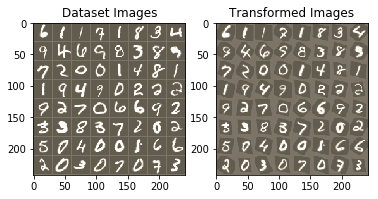

r: 0, t: 0, s: 20

Test set: Average loss: 0.0534, Accuracy: 9812/10000 (98%)



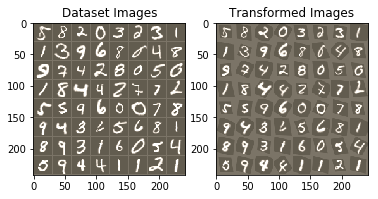

r: 0, t: 0, s: 30

Test set: Average loss: 0.0577, Accuracy: 9807/10000 (98%)



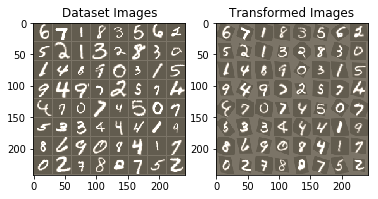

r: 0, t: 0, s: 40

Test set: Average loss: 0.0673, Accuracy: 9777/10000 (98%)



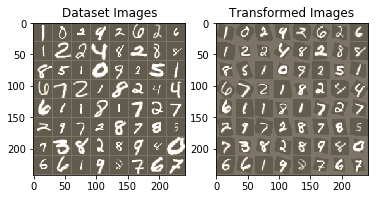

r: 0, t: 0, s: 50

Test set: Average loss: 0.0799, Accuracy: 9765/10000 (98%)



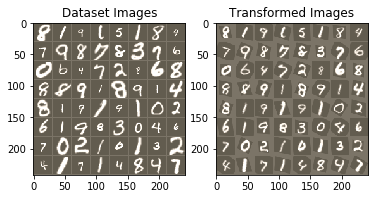

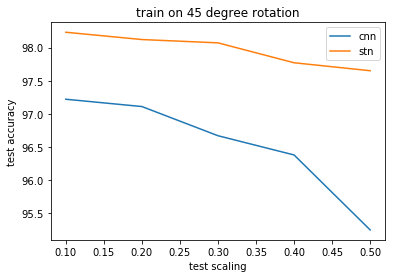

In [17]:
degrees = [0]
translations = [0]
scalings = [0.1,0.2,0.3,0.4,0.5]

cnn = torch.load('models/cnn_R45_T10_S30.cpt')
cnn_test_acc = getTest(cnn, degrees, translations, scalings)
stn = torch.load('models/STN_R45_T10_S30.cpt')
stn_test_acc = getTest(stn, degrees, translations, scalings, visualize=True)

plt.plot(scalings, cnn_test_acc, label="cnn")
plt.plot(scalings, stn_test_acc, label="stn")
plt.legend()
plt.ylabel('test accuracy')
plt.xlabel('test scaling')
plt.title('train on 45 degree rotation')
plt.show()

{'translate': [0.0667093308557842, 0.016648947606914793], 'degree': -36.87183910203751, 'scale': 1.0641975838768833}


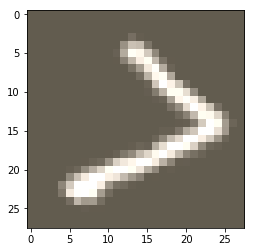

In [4]:
# example evaluation based on actual parameters
visual_loader = torch.utils.data.DataLoader(
        datasets.MNIST(root='.', train=False, transform=transforms.Compose([
            RandomRTS(degree=(-45, 45), scale=(0.7,1.2), new_center_diff=[-0.1, 0.1]),
            wrap(transforms.ToTensor()),
            wrap(transforms.Normalize((0.1307,), (0.3081,)))
        ])), batch_size=64, shuffle=True, num_workers=4)

a, b  = visual_loader.dataset[0]
plt.imshow(convert_image_np(a['image']))
print(a['theta'])

# double MNIST

In [28]:
d = DoubleMNIST(transform=transforms.Compose([
            RandomRTS(degree=(-45, 45), translate=(-0.1,0.1), scale=(1-0.3,1+0.3)),
            wrap(transforms.ToTensor()),
            wrap(transforms.Normalize((0.1307,), (0.3081,)))
        ]))

10


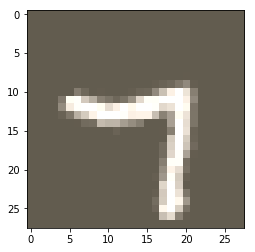

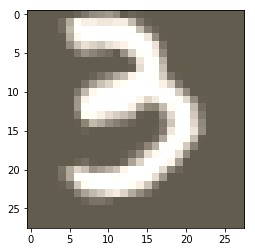

torch.Size([1, 28, 56])


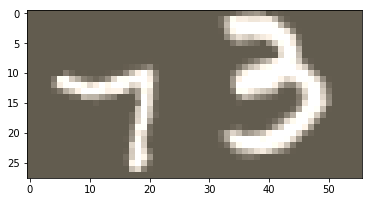

In [30]:
(im1, im2), y = d[0]
print(y)
plt.imshow(convert_image_np(im1))
plt.show()
plt.imshow(convert_image_np(im2))
plt.show()
im = torch.cat([im1, im2], dim=2)
print(im.shape)
plt.imshow(convert_image_np(im))
plt.show()


In [19]:
model = STN2()
use_cuda = torch.cuda.is_available()
if use_cuda:
    model = to_cuda(model)

In [20]:
# get dataset
l = 'models/'
r, t, s = 45, 0.1, 0.3
m = 'stn'
train_loader = torch.utils.data.DataLoader(
    DoubleMNIST(train=True,
                transform=transforms.Compose([
                    RandomRTS(degree=(-r, r),   
                              translate=(-t, t),
                              scale=(1-s,1+s)),
                    wrap(transforms.ToTensor()),
                    wrap(transforms.Normalize((0.1307,), (0.3081,)))
                ])), batch_size=64, shuffle=True, num_workers=4)

test_loader = torch.utils.data.DataLoader(
    DoubleMNIST(train=False, transform=transforms.Compose([
        RandomRTS(degree=(0, 0), translate=(0,0), scale=(1,1)),
        wrap(transforms.ToTensor()),
        wrap(transforms.Normalize((0.1307,), (0.3081,)))
    ])), batch_size=64, shuffle=True, num_workers=4)

# training                                                                                                                                                                     
optimizer = optim.Adam(model.parameters())
trainer = Trainer(model, optimizer, use_cuda=use_cuda)

for epoch in range(1, 10+1):
    trainer.train(train_loader)
    trainer.test(test_loader)

# save the model                                                                                                                                                               
os.system('mkdir -p %s' % l)
loc = os.path.join(l,
                   "%s_R%d_T%d_S%d.cpt" % (m, r, t*100, s*100))
torch.save(model, loc)

Train Epoch: 1 [0/119999 (0%)]	Loss: 2.956897
Train Epoch: 1 [32000/119999 (27%)]	Loss: 2.602695
Train Epoch: 1 [64000/119999 (53%)]	Loss: 2.221989
Train Epoch: 1 [96000/119999 (80%)]	Loss: 2.049809

Test set: Average loss: 1.3927, Accuracy: 11614/19999 (58%)

Train Epoch: 2 [0/119999 (0%)]	Loss: 1.990053
Train Epoch: 2 [32000/119999 (27%)]	Loss: 1.648641
Train Epoch: 2 [64000/119999 (53%)]	Loss: 1.776267
Train Epoch: 2 [96000/119999 (80%)]	Loss: 1.681226

Test set: Average loss: 0.9134, Accuracy: 15714/19999 (79%)

Train Epoch: 3 [0/119999 (0%)]	Loss: 1.471136
Train Epoch: 3 [32000/119999 (27%)]	Loss: 1.711931
Train Epoch: 3 [64000/119999 (53%)]	Loss: 1.435390
Train Epoch: 3 [96000/119999 (80%)]	Loss: 1.185241

Test set: Average loss: 0.6823, Accuracy: 17147/19999 (86%)

Train Epoch: 4 [0/119999 (0%)]	Loss: 1.258093
Train Epoch: 4 [32000/119999 (27%)]	Loss: 1.405995
Train Epoch: 4 [64000/119999 (53%)]	Loss: 1.213098
Train Epoch: 4 [96000/119999 (80%)]	Loss: 1.219865

Test set: Average

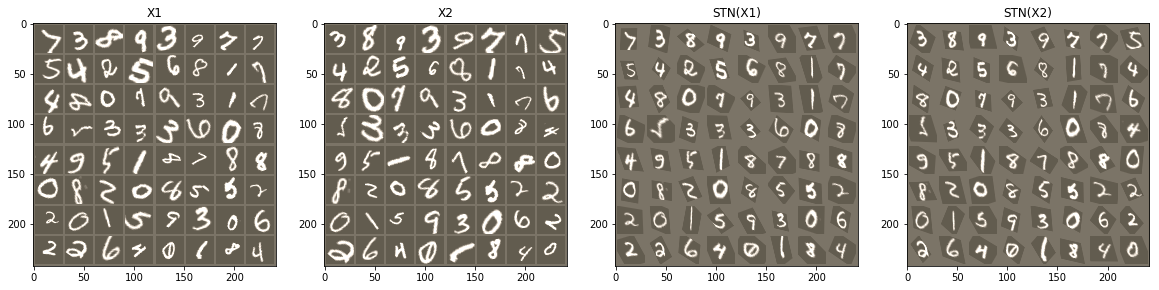

In [51]:
# evaluation code
double_stn = torch.load(loc)

def visualize_stn2(visual_loader, model):
    # Get a batch of training data
    data, _ = next(iter(visual_loader))
    data = to_var(data, volatile=True)

    if use_cuda:
        data = to_cuda(data)
    
    x1, x2 = data
    input_tensor1 = x1.cpu().data
    input_tensor2 = x2.cpu().data

    transformed_input_tensor1 = model.stn(x1).cpu().data
    transformed_input_tensor2 = model.stn(x2).cpu().data

    in_grid1 = convert_image_np(
        torchvision.utils.make_grid(input_tensor1))
    in_grid2 = convert_image_np(
        torchvision.utils.make_grid(input_tensor2))

    out_grid1 = convert_image_np(
        torchvision.utils.make_grid(transformed_input_tensor1))
    out_grid2 = convert_image_np(
        torchvision.utils.make_grid(transformed_input_tensor2))

    # Plot the results side-by-side
    f, axarr = plt.subplots(1, 4)
    f.set_size_inches(20,10)

    axarr[0].imshow(in_grid1)
    axarr[0].set_title('X1')

    axarr[1].imshow(in_grid2)
    axarr[1].set_title('X2')

    axarr[2].imshow(out_grid1)
    axarr[2].set_title('STN(X1)')

    axarr[3].imshow(out_grid2)
    axarr[3].set_title('STN(X2)')

visual_loader = torch.utils.data.DataLoader(
    DoubleMNIST(train=True,
                transform=transforms.Compose([
                    RandomRTS(degree=(-45, 45),   
                              translate=(-t, t),
                              scale=(1-s,1+s)),
                    wrap(transforms.ToTensor()),
                    wrap(transforms.Normalize((0.1307,), (0.3081,)))
                ])), batch_size=64, shuffle=False, num_workers=4)


visualize_stn2(visual_loader, double_stn)

# double mnist: 1 image multiple objects

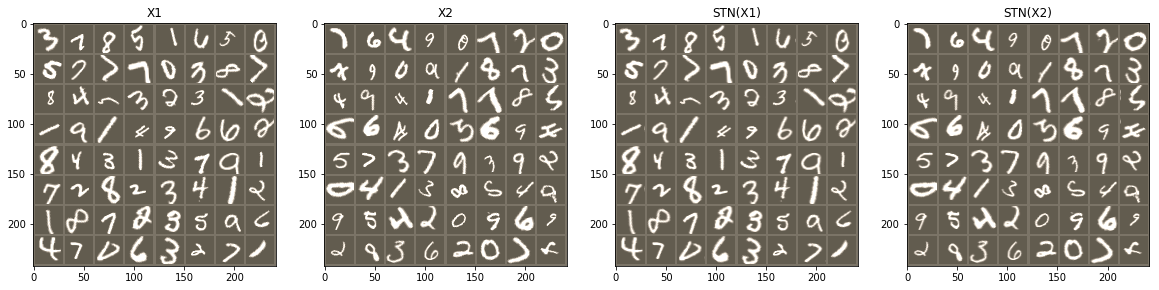

Train Epoch: 1 [0/119999 (0%)]	Loss: 2.956925
Train Epoch: 1 [32000/119999 (27%)]	Loss: 2.706561
Train Epoch: 1 [64000/119999 (53%)]	Loss: 2.650261
Train Epoch: 1 [96000/119999 (80%)]	Loss: 2.253994

Test set: Average loss: 1.8119, Accuracy: 8693/19999 (43%)



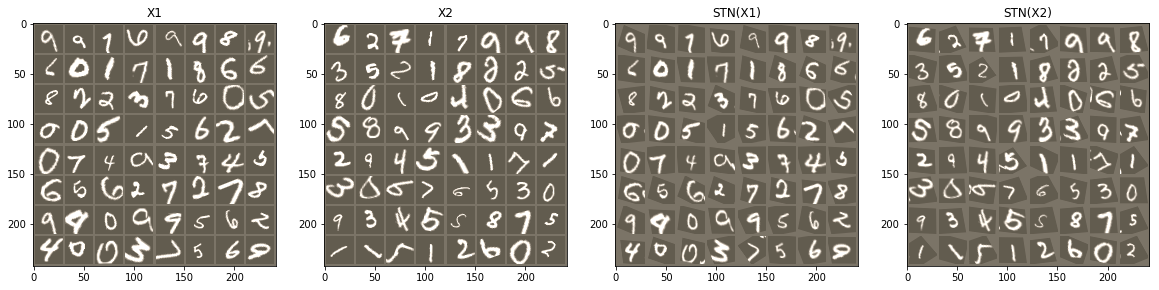

Train Epoch: 2 [0/119999 (0%)]	Loss: 2.166062
Train Epoch: 2 [32000/119999 (27%)]	Loss: 2.154192
Train Epoch: 2 [64000/119999 (53%)]	Loss: 1.885647
Train Epoch: 2 [96000/119999 (80%)]	Loss: 1.879996

Test set: Average loss: 1.4193, Accuracy: 12332/19999 (62%)



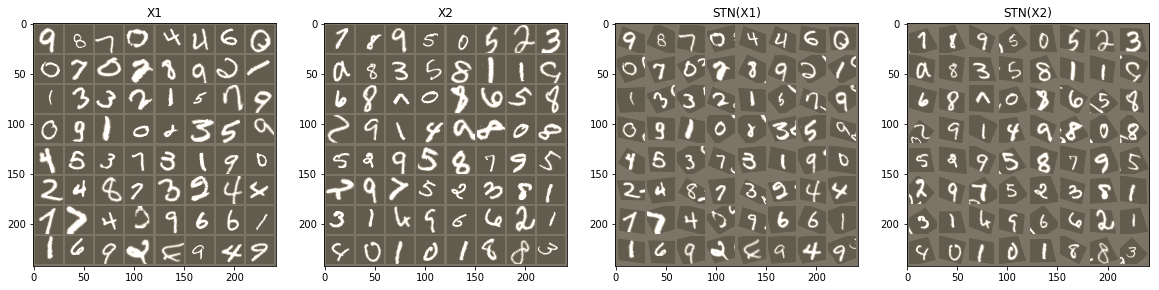

Train Epoch: 3 [0/119999 (0%)]	Loss: 1.973225
Train Epoch: 3 [32000/119999 (27%)]	Loss: 1.836627
Train Epoch: 3 [64000/119999 (53%)]	Loss: 1.919210
Train Epoch: 3 [96000/119999 (80%)]	Loss: 1.866498

Test set: Average loss: 1.1006, Accuracy: 14765/19999 (74%)



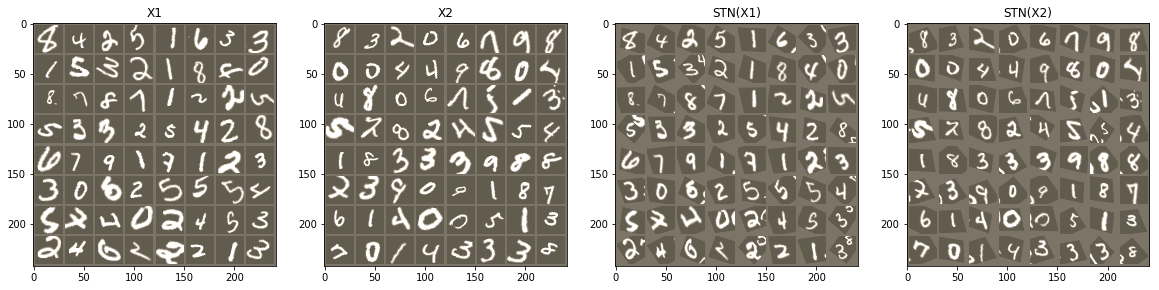

Train Epoch: 4 [0/119999 (0%)]	Loss: 1.643457
Train Epoch: 4 [32000/119999 (27%)]	Loss: 1.852037
Train Epoch: 4 [64000/119999 (53%)]	Loss: 1.536635
Train Epoch: 4 [96000/119999 (80%)]	Loss: 1.839457

Test set: Average loss: 0.7830, Accuracy: 16288/19999 (81%)



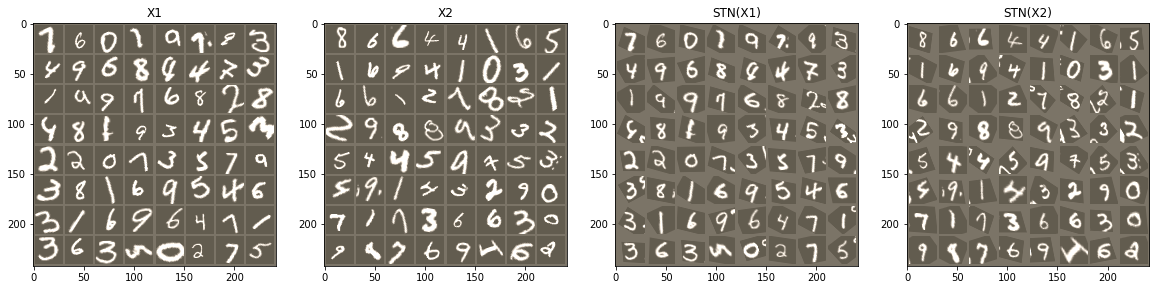

Train Epoch: 5 [0/119999 (0%)]	Loss: 1.525043
Train Epoch: 5 [32000/119999 (27%)]	Loss: 1.381811
Train Epoch: 5 [64000/119999 (53%)]	Loss: 1.663230
Train Epoch: 5 [96000/119999 (80%)]	Loss: 1.629691

Test set: Average loss: 0.8520, Accuracy: 16033/19999 (80%)



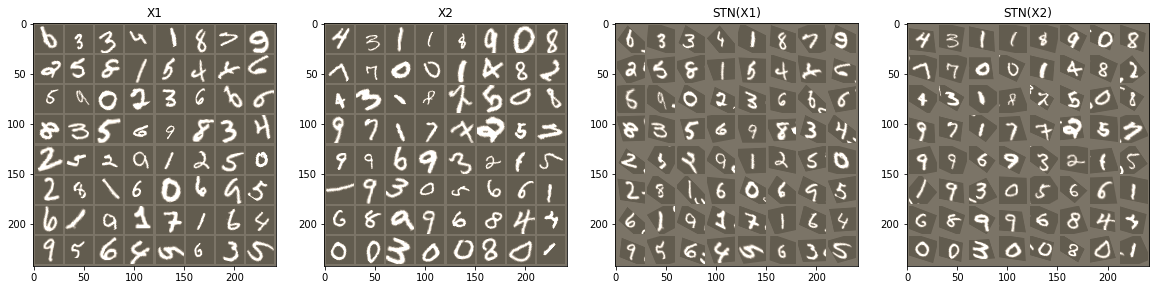

Train Epoch: 6 [0/119999 (0%)]	Loss: 1.598021
Train Epoch: 6 [32000/119999 (27%)]	Loss: 1.431599
Train Epoch: 6 [64000/119999 (53%)]	Loss: 1.474556
Train Epoch: 6 [96000/119999 (80%)]	Loss: 1.382358

Test set: Average loss: 0.6527, Accuracy: 17420/19999 (87%)



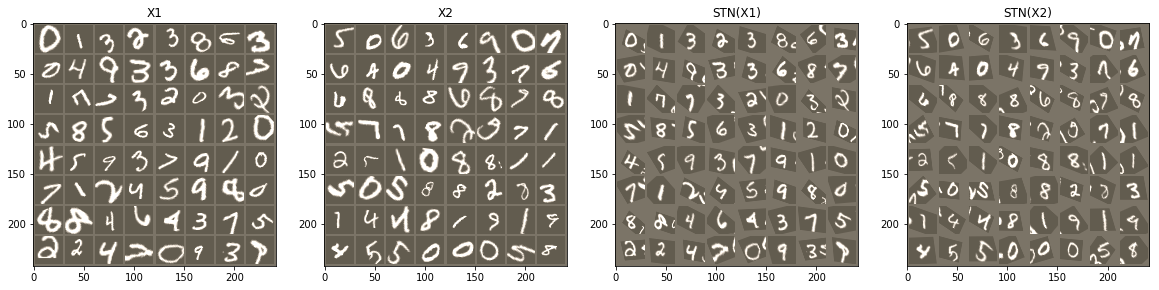

Train Epoch: 7 [0/119999 (0%)]	Loss: 1.418313
Train Epoch: 7 [32000/119999 (27%)]	Loss: 1.532268
Train Epoch: 7 [64000/119999 (53%)]	Loss: 1.287113
Train Epoch: 7 [96000/119999 (80%)]	Loss: 1.253395

Test set: Average loss: 0.6352, Accuracy: 17379/19999 (87%)



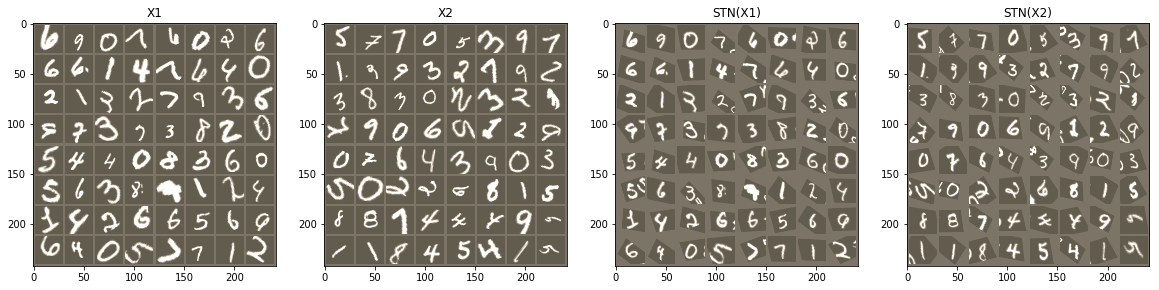

Train Epoch: 8 [0/119999 (0%)]	Loss: 1.577643
Train Epoch: 8 [32000/119999 (27%)]	Loss: 1.579625
Train Epoch: 8 [64000/119999 (53%)]	Loss: 1.302376
Train Epoch: 8 [96000/119999 (80%)]	Loss: 1.221550

Test set: Average loss: 0.5223, Accuracy: 18019/19999 (90%)



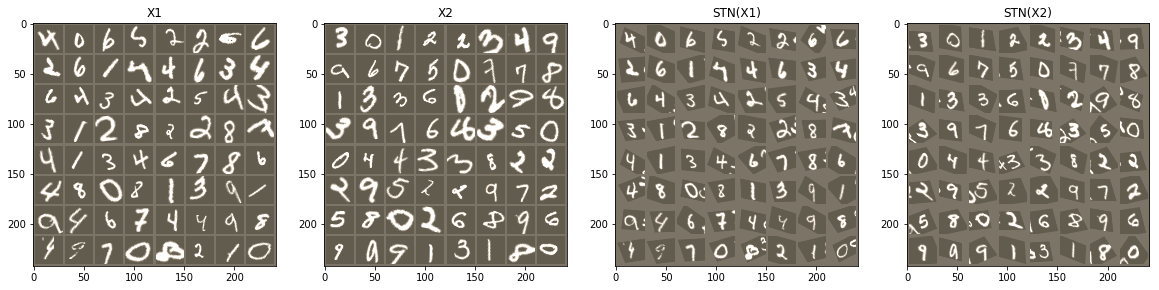

Train Epoch: 9 [0/119999 (0%)]	Loss: 1.128217
Train Epoch: 9 [32000/119999 (27%)]	Loss: 1.332915
Train Epoch: 9 [64000/119999 (53%)]	Loss: 1.546563
Train Epoch: 9 [96000/119999 (80%)]	Loss: 1.359526

Test set: Average loss: 0.5267, Accuracy: 17938/19999 (90%)



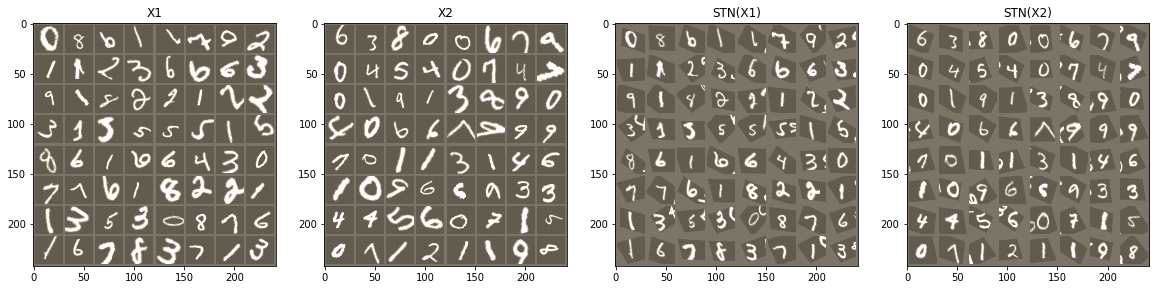

Train Epoch: 10 [0/119999 (0%)]	Loss: 1.448028
Train Epoch: 10 [32000/119999 (27%)]	Loss: 1.254925
Train Epoch: 10 [64000/119999 (53%)]	Loss: 1.766627
Train Epoch: 10 [96000/119999 (80%)]	Loss: 1.468507

Test set: Average loss: 0.5647, Accuracy: 17839/19999 (89%)



PicklingError: Can't pickle <class 'lib.model.STN3'>: it's not the same object as lib.model.STN3

In [83]:
model = STN3()
use_cuda = torch.cuda.is_available()
if use_cuda:
    model = to_cuda(model)
    
# get dataset
l = 'models/'
r, t, s = 45, 0.1, 0.3
m = 'stn_same_image'
train_loader = torch.utils.data.DataLoader(
    DoubleMNIST(train=True,
                transform=transforms.Compose([
                    RandomRTS(degree=(-r, r),   
                              translate=(-t, t),
                              scale=(1-s,1+s)),
                    wrap(transforms.ToTensor()),
                    wrap(transforms.Normalize((0.1307,), (0.3081,)))
                ])), batch_size=64, shuffle=True, num_workers=4)

test_loader = torch.utils.data.DataLoader(
    DoubleMNIST(train=False, transform=transforms.Compose([
        RandomRTS(degree=(0, 0), translate=(0,0), scale=(1,1)),
        wrap(transforms.ToTensor()),
        wrap(transforms.Normalize((0.1307,), (0.3081,)))
    ])), batch_size=64, shuffle=True, num_workers=4)

# training                                                                                                                                                                     
optimizer = optim.Adam(model.parameters())
trainer = Trainer(model, optimizer, use_cuda=use_cuda)

for epoch in range(1, 10+1):
    visualize_stn3(train_loader, model)
    plt.show()
    trainer.train(train_loader)
    trainer.test(test_loader)

# save the model                                                                                                                                                               
os.system('mkdir -p %s' % l)
loc = os.path.join(l,
                   "%s_R%d_T%d_S%d.cpt" % (m, r, t*100, s*100))
torch.save(model, loc)

In [71]:
stn3 = model

In [6]:
# evaluation code
def visualize_stn3(visual_loader, model):
    # Get a batch of training data
    data, _ = next(iter(visual_loader))
    data = to_var(data, volatile=True)

    if use_cuda:
        data = to_cuda(data)
    
    x = torch.cat(data, dim=3)
    input_tensor1 = data[0].cpu().data
    input_tensor2 = data[1].cpu().data

    transformed_input_tensor1, transformed_input_tensor2 = model.stn(x)
    transformed_input_tensor1 = transformed_input_tensor1.cpu().data
    transformed_input_tensor2 = transformed_input_tensor2.cpu().data

    in_grid1 = convert_image_np(
        torchvision.utils.make_grid(input_tensor1))
    in_grid2 = convert_image_np(
        torchvision.utils.make_grid(input_tensor2))

    out_grid1 = convert_image_np(
        torchvision.utils.make_grid(transformed_input_tensor1))
    out_grid2 = convert_image_np(
        torchvision.utils.make_grid(transformed_input_tensor2))

    # Plot the results side-by-side
    f, axarr = plt.subplots(1, 4)
    f.set_size_inches(20,10)

    axarr[0].imshow(in_grid1)
    axarr[0].set_title('X1')

    axarr[1].imshow(in_grid2)
    axarr[1].set_title('X2')

    axarr[2].imshow(out_grid1)
    axarr[2].set_title('STN(X1)')

    axarr[3].imshow(out_grid2)
    axarr[3].set_title('STN(X2)')


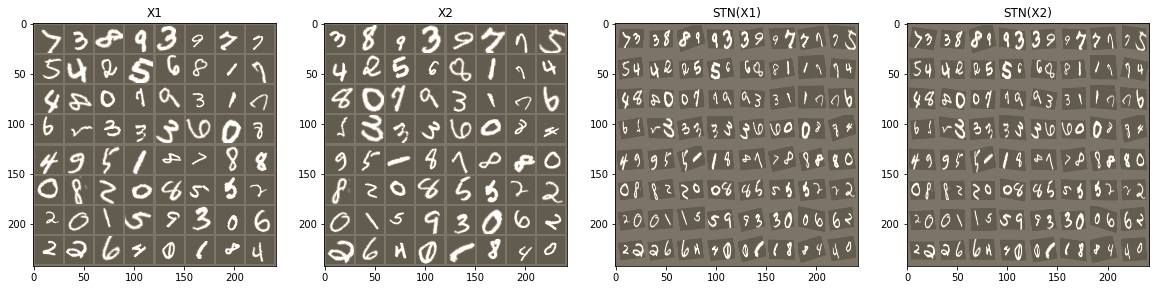

In [72]:

visual_loader = torch.utils.data.DataLoader(
    DoubleMNIST(train=True,
                transform=transforms.Compose([
                    RandomRTS(degree=(-45, 45),   
                              translate=(-t, t),
                              scale=(1-s,1+s)),
                    wrap(transforms.ToTensor()),
                    wrap(transforms.Normalize((0.1307,), (0.3081,)))
                ])), batch_size=64, shuffle=False, num_workers=4)


visualize_stn3(visual_loader, stn3)

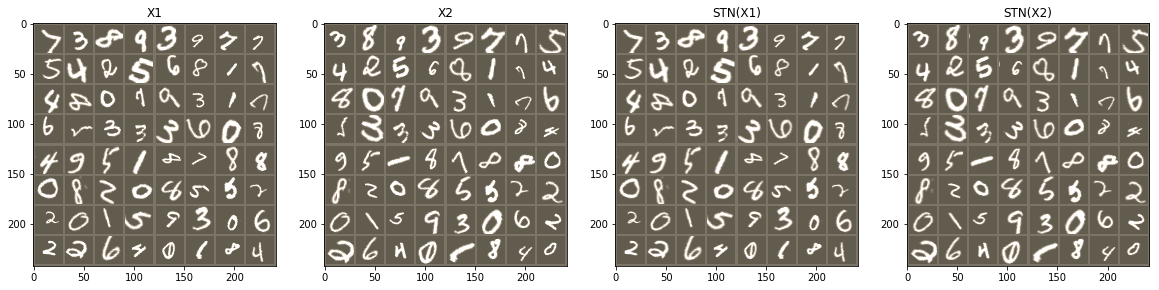

In [77]:
visualize_stn3(visual_loader, STN3().cuda())

# the final set of visualizations

## experiment 1

## experiment 2

## experiment 3

In [4]:
modelpath = [
    # if border or initialization helps
    "models/run1/border/lr/one/stn_R45_T10_S30.cpt",
    "models/run1/zeros/lr/one/stn_R45_T10_S30.cpt",
    "models/run1/border/identity/one/stn_R45_T10_S30.cpt",
    "models/run1/zeros/identity/one/stn_R45_T10_S30.cpt",
    "models/run1/border/rand/one/stn_R45_T10_S30.cpt",
    "models/run1/zeros/rand/one/stn_R45_T10_S30.cpt",
    # baseline
    "models/run1/one/cnn_R45_T10_S30.cpt"
]

models/run1/border/lr/one/stn_R45_T10_S30.cpt


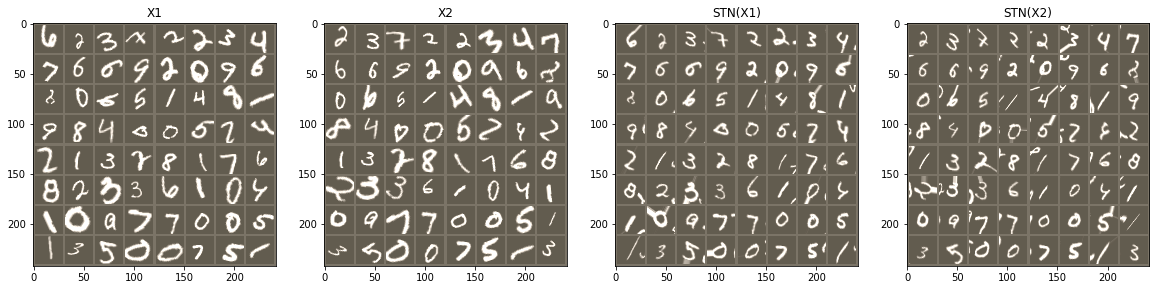


Test set: Average loss: 0.5812, Accuracy: 17420/19999 (87%)

models/run1/zeros/lr/one/stn_R45_T10_S30.cpt


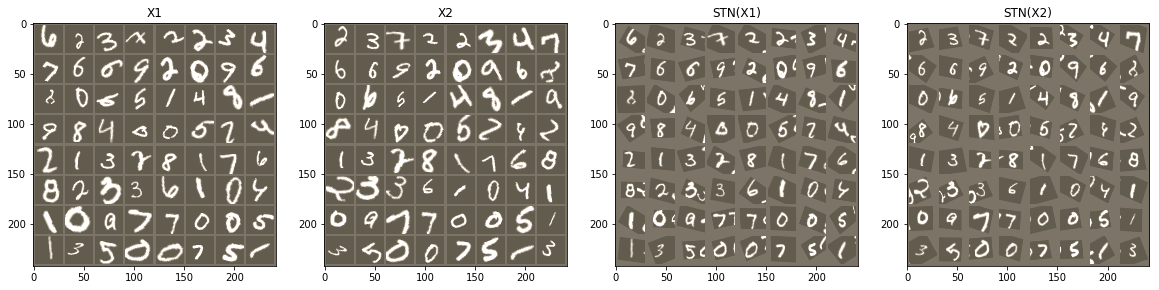


Test set: Average loss: 0.4441, Accuracy: 18400/19999 (92%)

models/run1/border/identity/one/stn_R45_T10_S30.cpt


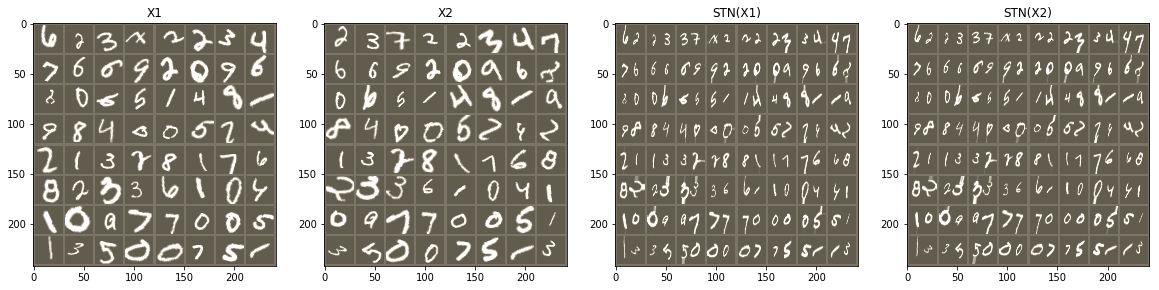


Test set: Average loss: 0.7402, Accuracy: 16759/19999 (84%)

models/run1/zeros/identity/one/stn_R45_T10_S30.cpt


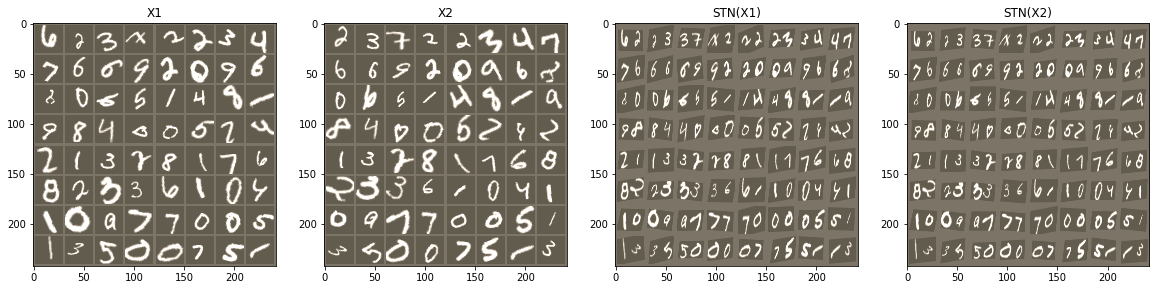


Test set: Average loss: 0.5036, Accuracy: 17947/19999 (90%)

models/run1/border/rand/one/stn_R45_T10_S30.cpt


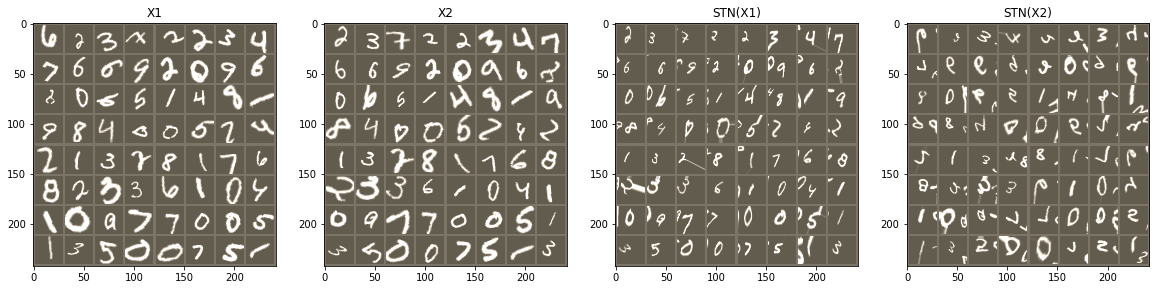


Test set: Average loss: 1.0598, Accuracy: 13801/19999 (69%)

models/run1/zeros/rand/one/stn_R45_T10_S30.cpt


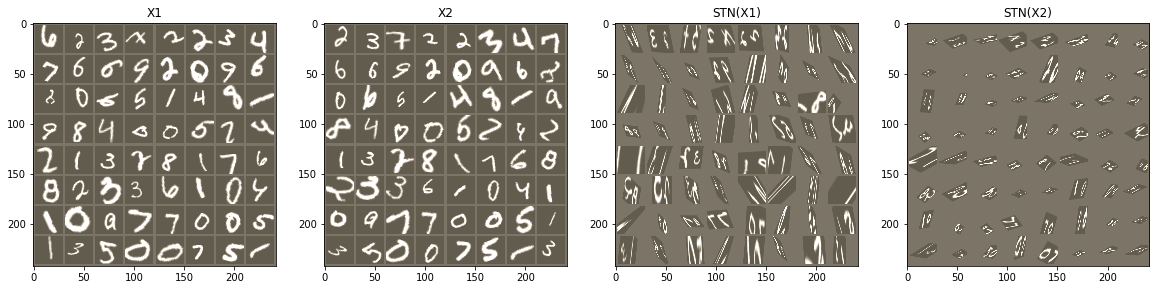


Test set: Average loss: 1.4282, Accuracy: 10019/19999 (50%)

models/run1/one/cnn_R45_T10_S30.cpt

Test set: Average loss: 0.7662, Accuracy: 16971/19999 (85%)



In [10]:
# 1. test performance on test set for all models, compare by border, compare by initialization
# 2. visualization, compare by initialization, pick best border result

visual_loader = torch.utils.data.DataLoader(
                DoubleMNIST(train=False,
                transform=transforms.Compose([
                    RandomRTS(degree=(-45, 45),   
                              translate=(-0.1, 0.1),
                              scale=(0.7,1.3)),
                    wrap(transforms.ToTensor()),
                    wrap(transforms.Normalize((0.1307,), (0.3081,)))
                ])), batch_size=64, shuffle=False, num_workers=4)

test_loader = torch.utils.data.DataLoader(
    DoubleMNIST(train=False, transform=transforms.Compose([
        RandomRTS(degree=(0, 0), translate=(0,0), scale=(1,1)),
        wrap(transforms.ToTensor()),
        wrap(transforms.Normalize((0.1307,), (0.3081,)))
    ])), batch_size=64, shuffle=True, num_workers=4)

tests = {}

for mp in modelpath:
    print(mp)
    m = torch.load(mp)
    
    if 'stn' in mp:
        visualize_stn3(visual_loader, m)
        plt.show()

    t = Trainer(m)
    tests[mp] = t.test(test_loader)

In [11]:
tests

{'models/run1/border/identity/one/stn_R45_T10_S30.cpt': 83.79918995949798,
 'models/run1/border/lr/one/stn_R45_T10_S30.cpt': 87.10435521776088,
 'models/run1/border/rand/one/stn_R45_T10_S30.cpt': 69.00845042252112,
 'models/run1/one/cnn_R45_T10_S30.cpt': 84.8592429621481,
 'models/run1/zeros/identity/one/stn_R45_T10_S30.cpt': 89.73948697434872,
 'models/run1/zeros/lr/one/stn_R45_T10_S30.cpt': 92.0046002300115,
 'models/run1/zeros/rand/one/stn_R45_T10_S30.cpt': 50.097504875243764}